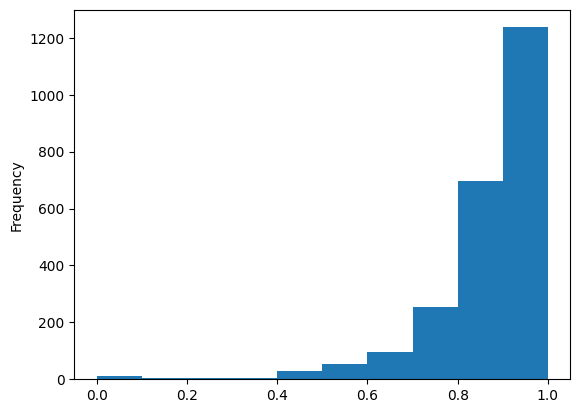

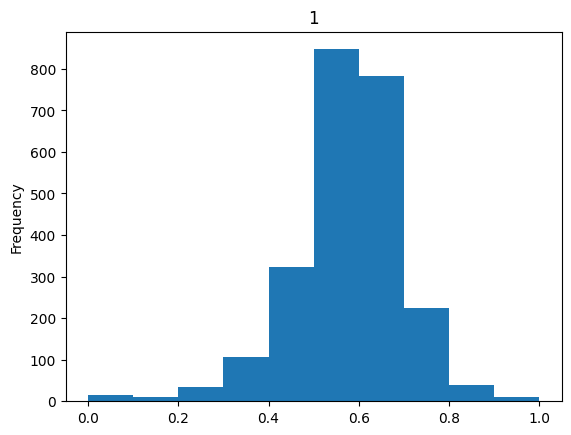

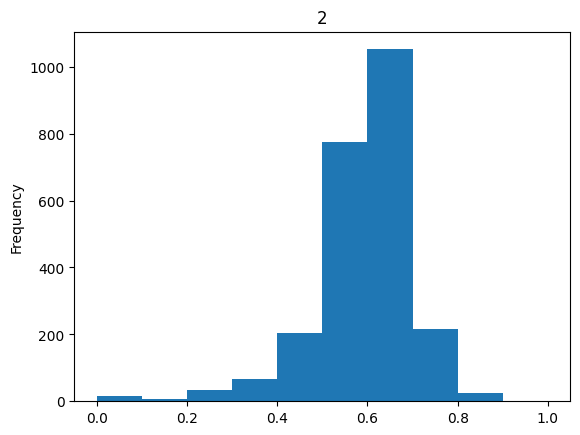

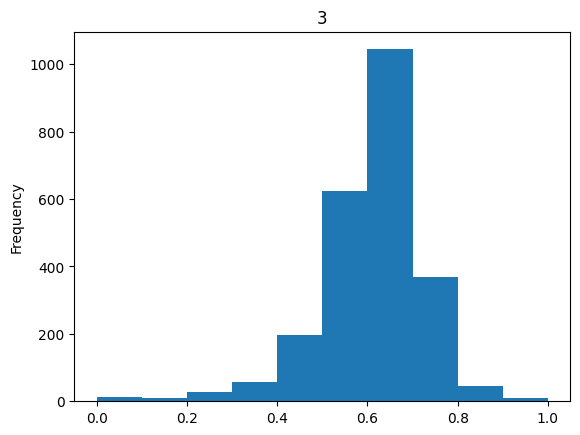

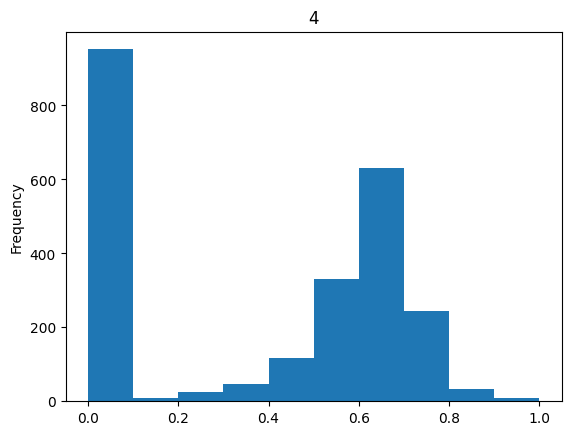

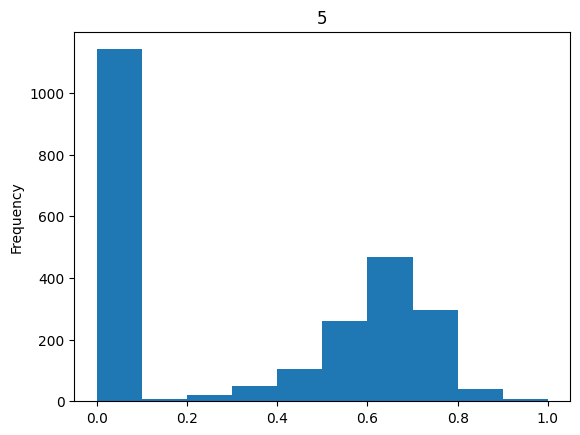

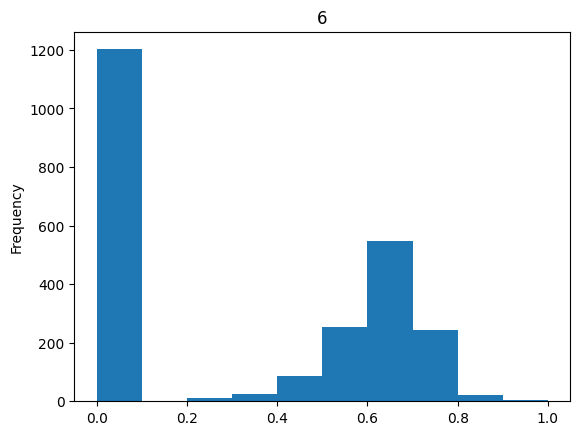

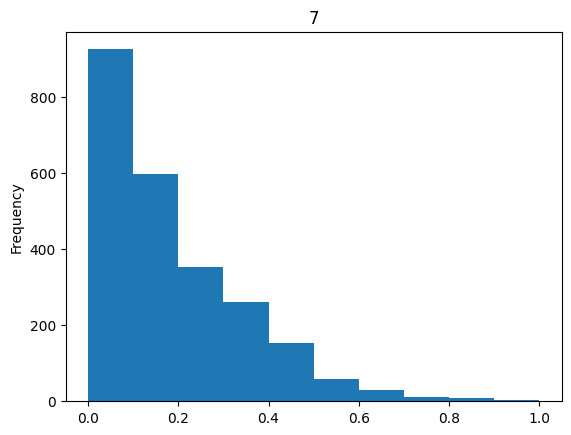

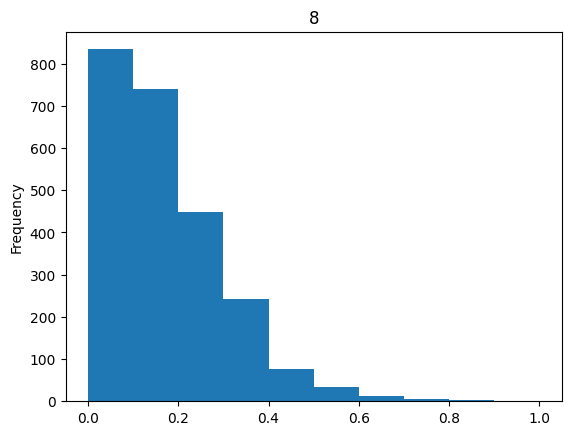

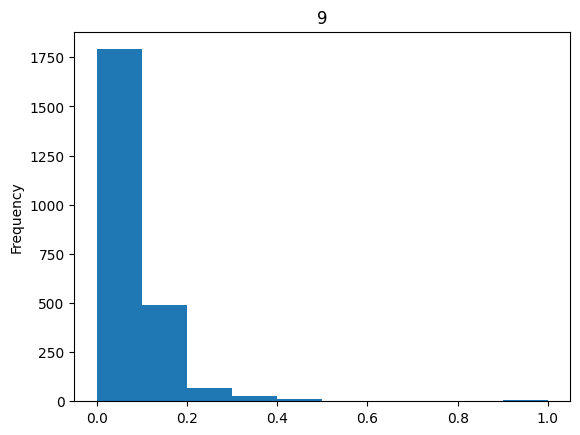

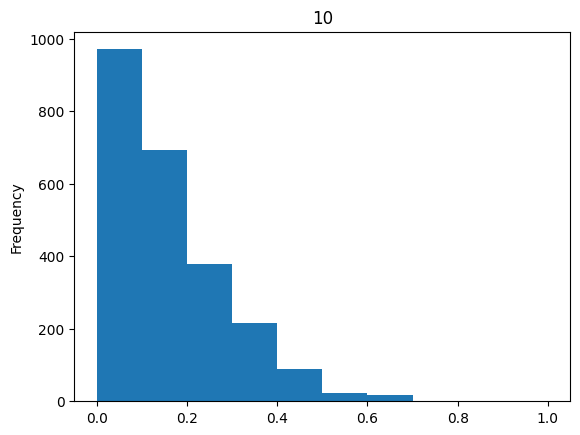

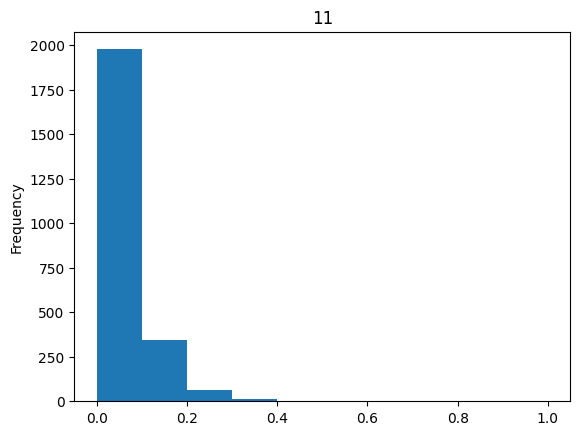

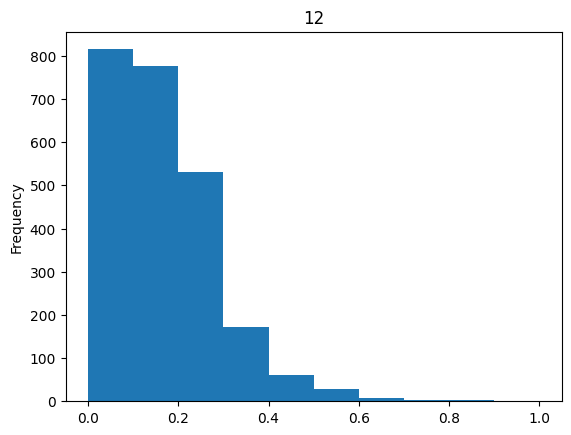

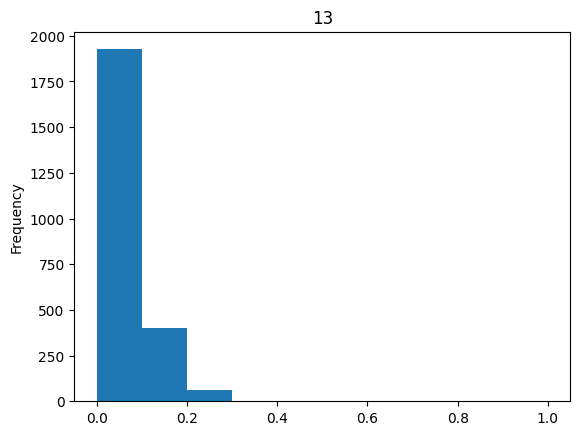

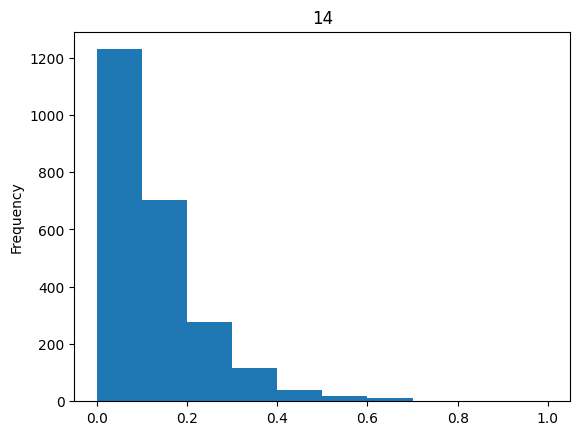

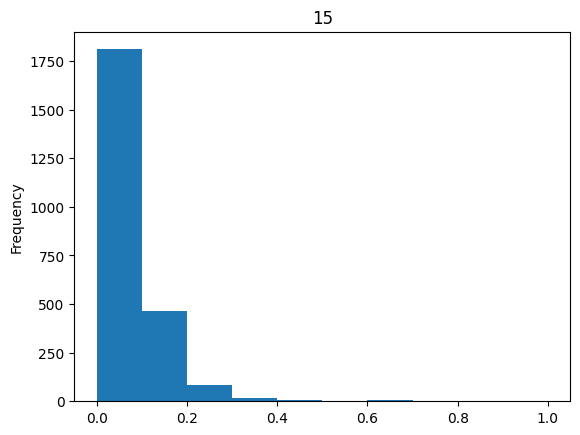

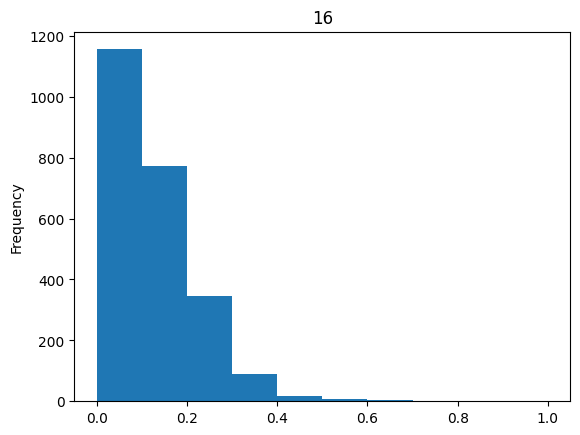

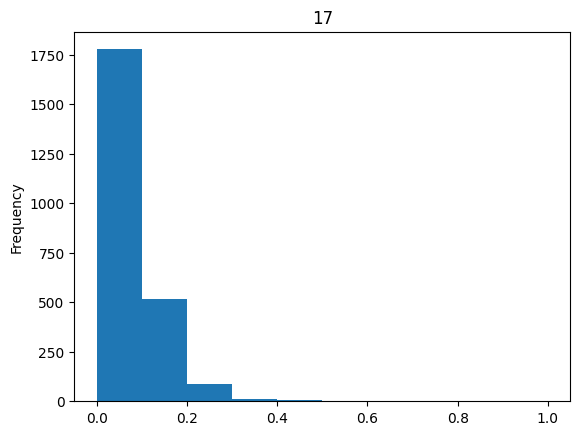

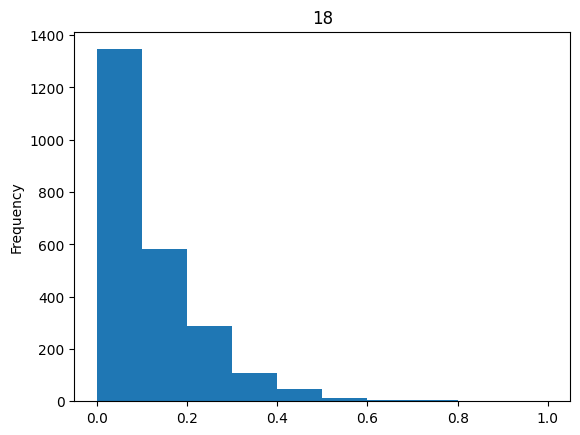

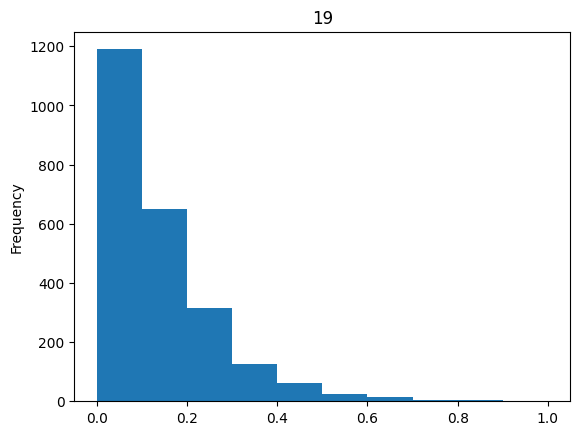

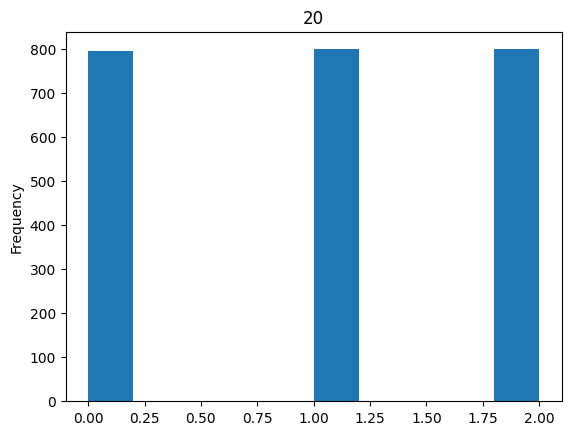

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

# Itera sobre cada columna y grafícala
for col in df.columns:
    df[col].plot(kind='hist', title=col)  # Puedes cambiar 'hist' por otro tipo de gráfico si lo prefieres
    plt.show()  # Muestra cada gráfico


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_800.csv", header=None)

# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Declarar lr y momentum
lr = 0.001
momentum = 0.9

# Definir el número de características y clases
num_features = X.shape[1]
num_classes = len(np.unique(y))

# Construir y compilar el modelo
entrada = tf.keras.Input(shape=(num_features,))
salida = tf.keras.layers.Dense(num_classes,activation="softmax")(entrada)
model= tf.keras.Model(inputs = entrada,outputs = salida)
#model = tf.keras.Model([
#    tf.keras.layers.Dense(num_classes, activation= 'sigmoid', input_shape=(num_features,))
#])

optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Validación cruzada
num_folds = 10

kf = KFold(n_splits=num_folds)

fold_accs = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Entrenar el modelo en este fold
    model.fit(X_train, y_train, epochs=10, verbose=0)

    # Evaluar el modelo en este fold
    _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
    fold_accs.append(fold_acc)

# Calcular la precisión promedio
mean_acc = np.mean(fold_accs)

print('Precisión promedio en validación cruzada:', mean_acc)

# Precisión promedio en validación cruzada: 0.5354545475915075    -> softmax

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
def primera_capa(): 
    num_features = X.shape[1]
    for epocas in range(20, 120, 20):
        for c in range (3,16):
            i = 0.2
            while i < 1:
                j = 0.5
                while j < 1:

                    #model = tf.keras.Sequential([tf.keras.layers.Dense(c, activation= 'sigmoid', input_shape=(num_features,))])
                    entrada = tf.keras.Input(shape=(num_features,))
                    salida = tf.keras.layers.Dense(c,activation="softmax")(entrada)
                    model= tf.keras.Model(inputs = entrada,outputs = salida)



                    optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
                    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
                    num_folds = 20

                    kf = KFold(n_splits=num_folds)

                    fold_accs = []

                    for train_index, val_index in kf.split(X):
                        X_train, X_val = X[train_index], X[val_index]
                        y_train, y_val = y[train_index], y[val_index]


                        model.fit(X_train, y_train, epochs=epocas, verbose=0)
                        _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
                        fold_accs.append(fold_acc)
                    mean_acc = np.mean(fold_accs)
                    with open("resultados_model_primera.csv", "a") as file:
                        file.write(f"{epocas},{c}, {i}, {j}, {mean_acc}\n")
                    print(epocas,c,i, j)

                    j += 0.5
                i += 0.2
            c = c+ 1

    #Este pertenece a la primera capa, pero aun falta modificarlo para la segunda

In [4]:
def segunda_capa(X,y):
    num_features = X.shape[1]
    epocas = 100
    for c in range (3,16):
            i = 0.2
            while i < 1:
                j = 0.1
                while j < 1:

                    #model = tf.keras.Sequential([tf.keras.layers.Dense(c, activation= 'sigmoid', input_shape=(num_features,))])
                    #entrada = tf.keras.Input(shape=(num_features,))
                    #salida = tf.keras.layers.Dense(c,activation="softmax")(entrada)
                    #model= tf.keras.Model(inputs = entrada,outputs = salida)

                    entrada = tf.keras.Input(shape=(num_features,))
                    oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
                    salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
                    model = tf.keras.Model(inputs=entrada, outputs=salida)

                    optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
                    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
                    num_folds = 15

                    kf = KFold(n_splits=num_folds)

                    fold_accs = []

                    for train_index, val_index in kf.split(X):
                        X_train, X_val = X[train_index], X[val_index]
                        y_train, y_val = y[train_index], y[val_index]


                        model.fit(X_train, y_train, epochs=epocas, verbose=0)
                        _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
                        fold_accs.append(fold_acc)
                    mean_acc = np.mean(fold_accs)
                    with open("resultados_model_segunda.csv", "a") as file:
                        file.write(f"{epocas},{c}, {i}, {j}, {mean_acc}\n")
                    print(epocas,c,i, j)

                    j += 0.1
                i += 0.2
            c = c+ 1

#Este pertenece a la primera capa, pero aun falta modificarlo para la segunda

In [9]:
segunda_capa(X,y)

100 3 0.2 0.1
100 3 0.2 0.2
100 3 0.2 0.30000000000000004
100 3 0.2 0.4
100 3 0.2 0.5
100 3 0.2 0.6
100 3 0.2 0.7
100 3 0.2 0.7999999999999999
100 3 0.2 0.8999999999999999
100 3 0.2 0.9999999999999999
100 3 0.4 0.1
100 3 0.4 0.2
100 3 0.4 0.30000000000000004
100 3 0.4 0.4
100 3 0.4 0.5
100 3 0.4 0.6
100 3 0.4 0.7
100 3 0.4 0.7999999999999999
100 3 0.4 0.8999999999999999
100 3 0.4 0.9999999999999999
100 3 0.6000000000000001 0.1
100 3 0.6000000000000001 0.2
100 3 0.6000000000000001 0.30000000000000004
100 3 0.6000000000000001 0.4
100 3 0.6000000000000001 0.5
100 3 0.6000000000000001 0.6
100 3 0.6000000000000001 0.7
100 3 0.6000000000000001 0.7999999999999999
100 3 0.6000000000000001 0.8999999999999999
100 3 0.6000000000000001 0.9999999999999999
100 3 0.8 0.1
100 3 0.8 0.2
100 3 0.8 0.30000000000000004
100 3 0.8 0.4
100 3 0.8 0.5
100 3 0.8 0.6
100 3 0.8 0.7
100 3 0.8 0.7999999999999999
100 3 0.8 0.8999999999999999
100 3 0.8 0.9999999999999999
100 4 0.2 0.1
100 4 0.2 0.2
100 4 0.2 0.300000

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf


# Prepare data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a base model -- sequential, functional, or subclass.
model = tf.keras.Sequential([
    tf.keras.Input((28, 28), name='feature'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Wrap the model with adversarial regularization.
adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

# Compile, train, and evaluate.
adv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
adv_model.fit({'feature': x_train, 'label': y_train}, batch_size=32, epochs=5)
adv_model.evaluate({'feature': x_test, 'label': y_test})

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
c= 11
epocas = 100
j = 0.899
i = 0.8
num_features = X.shape[1]
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)


optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)


model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
num_folds = 15

kf = KFold(n_splits=num_folds)

fold_accs = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]


    model.fit(X_train, y_train, epochs=epocas, verbose=0)
    _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
    fold_accs.append(fold_acc)
    print(epocas,c,i, j,fold_acc)
mean_acc = np.mean(fold_accs)
print(epocas,c,i, j,mean_acc)


100 11 0.8 0.899 0.5687500238418579
100 11 0.8 0.899 0.8374999761581421
100 11 0.8 0.899 0.9437500238418579
100 11 0.8 0.899 0.9437500238418579
100 11 0.8 0.899 0.90625
100 11 0.8 0.899 0.8812500238418579
100 11 0.8 0.899 0.887499988079071
100 11 0.8 0.899 0.862500011920929
100 11 0.8 0.899 0.8999999761581421
100 11 0.8 0.899 0.9125000238418579
100 11 0.8 0.899 0.824999988079071
100 11 0.8 0.899 0.90625
100 11 0.8 0.899 0.893081784248352
100 11 0.8 0.899 0.8616352081298828
100 11 0.8 0.899 0.7861635088920593
100 11 0.8 0.899 0.8610587040583293


In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
c = 11
epocas = 100
j = 0.899
i = 0.8
num_features = X.shape[1]
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# División de datos entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train, epochs=epocas, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc}')


Test accuracy: 0.7458333373069763


Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8180 - loss: 0.4503 - val_accuracy: 0.9057 - val_loss: 0.3085
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8074 - loss: 0.4844 - val_accuracy: 0.8302 - val_loss: 0.4348
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7933 - loss: 0.5378 - val_accuracy: 0.8679 - val_loss: 0.3758
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8344 - loss: 0.4218 - val_accuracy: 0.7547 - val_loss: 0.5806
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8372 - loss: 0.4176 - val_accuracy: 0.7358 - val_loss: 0.6409
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8479 - loss: 0.4289 - val_accuracy: 0.7925 - val_loss: 0.5285
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8450 - loss: 0.4159 - val_accuracy: 0.8679 - val_loss: 0.4531
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8378 - loss: 0.4125 - val_accuracy: 0.6226 - v

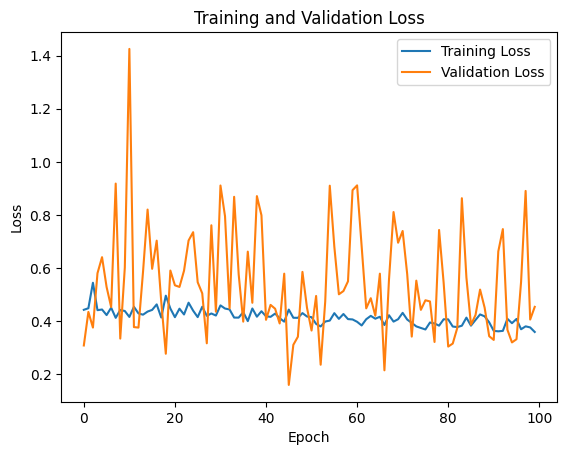

In [18]:
import matplotlib.pyplot as plt

# Suponiendo que ya tienes un modelo entrenado y su historial de entrenamiento guardado en `history`
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


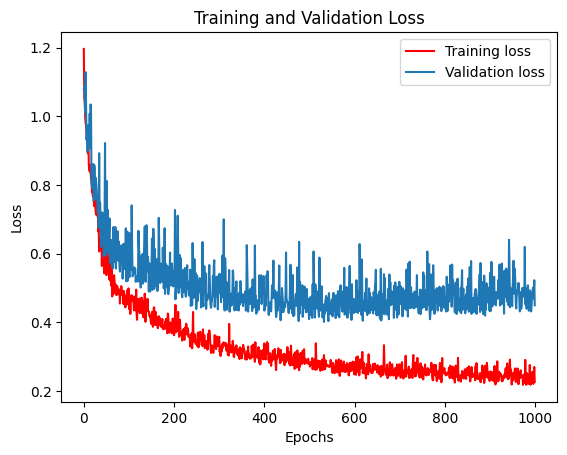

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8112 - loss: 0.5948 
Test Loss: 0.5529651045799255
Test Accuracy: 0.8374999761581421


In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

c = 11
epocas = 1000
j = 0.89999
i = 0.8
num_features = X.shape[1]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

# Compilar el modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=epocas, validation_split=0.2, verbose=0)

# Obtener la pérdida y la precisión de entrenamiento y prueba
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Graficar la función de pérdida
plt.plot( train_loss,  label='Training loss', color ='red')
plt.plot( val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


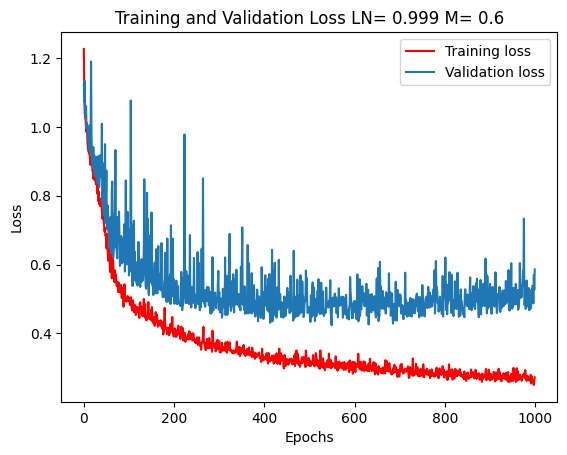

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8254 - loss: 0.5609 
Test Loss: 0.5803922414779663
Test Accuracy: 0.824999988079071


In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

c = 11
epocas = 1000
j = 0.999
i = 0.6
num_features = X.shape[1]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

# Compilar el modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=epocas, validation_split=0.2, verbose=0)

# Obtener la pérdida y la precisión de entrenamiento y prueba
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Graficar la función de pérdida
plt.plot( train_loss,  label='Training loss', color ='red')
plt.plot( val_loss, label='Validation loss')
plt.title('Training and Validation Loss LN= 0.999 M= 0.6')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


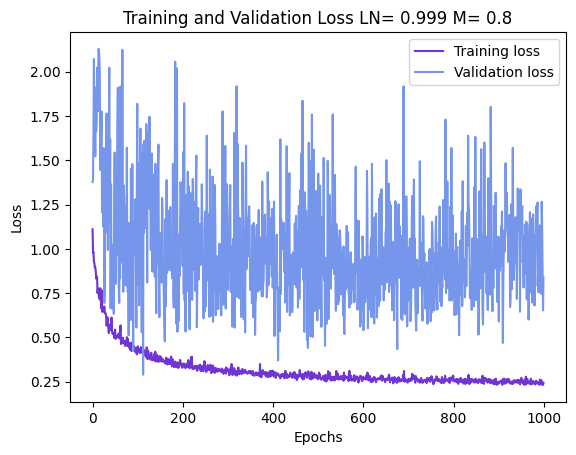

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.8490 - loss: 0.3679
Test Loss: 0.3686077892780304
Test Accuracy: 0.8666666746139526


In [97]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

c = 11
epocas = 1000
j = 0.9999
i = 0.8
num_features = X.shape[1]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

# Compilar el modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X, y, epochs=epocas, validation_split=0.2, verbose=0)

# Obtener la pérdida y la precisión de entrenamiento y prueba
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Graficar la función de pérdida
plt.plot( train_loss,  label='Training loss', color='#7035d3')
plt.plot( val_loss, label='Validation loss', color='#7696eb')
plt.title('Training and Validation Loss LN= 0.999 M= 0.8')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


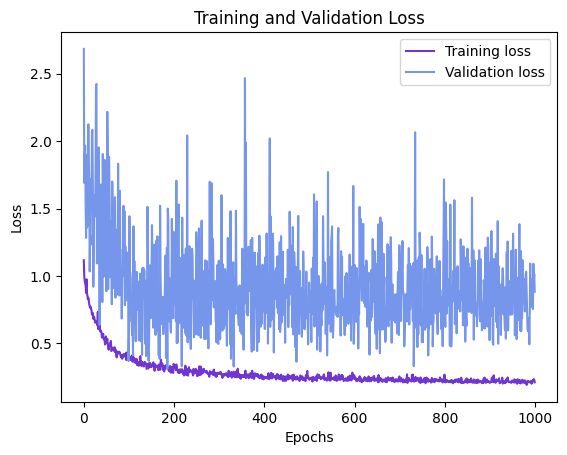

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.8944 - loss: 0.3203
Test Loss: 0.31873542070388794
Test Accuracy: 0.887499988079071


In [98]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

c = 11
epocas = 1000
j = 0.9999
i = 0.8
num_features = X.shape[1]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

# Compilar el modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X, y, epochs=epocas, validation_split=0.2, verbose=0)

# Obtener la pérdida y la precisión de entrenamiento y prueba
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Graficar la función de pérdida
plt.plot( train_loss,  label='Training loss', color='#7035d3')
plt.plot( val_loss, label='Validation loss', color='#7696eb')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


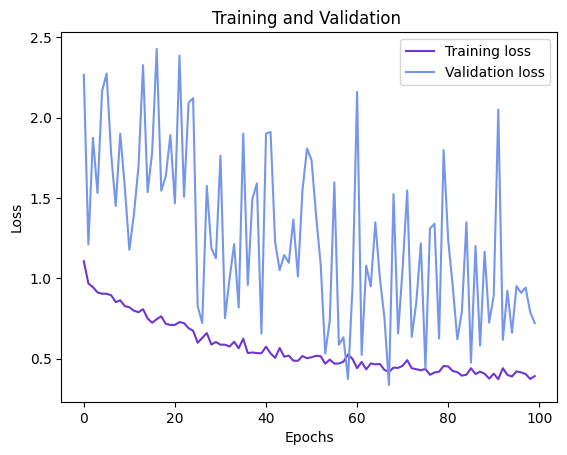

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8417 - loss: 0.4235 
Test Loss: 0.4238901436328888
Test Accuracy: 0.8416666388511658


In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

c = 11
epocas = 100
j = 0.9999
i = 0.8
num_features = X.shape[1]


# Definir el modelo
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

# Compilar el modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X, y, epochs=epocas, validation_split=0.2, verbose=0)

# Obtener la pérdida y la precisión de entrenamiento y prueba
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Graficar la función de pérdida
plt.plot( train_loss,  label='Training loss', color='#7035d3')
plt.plot( val_loss, label='Validation loss', color='#7696eb')
plt.title('Training and Validation ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


100 11 0.8 0.8999999 0.7875000238418579
100 11 0.8 0.8999999 0.8187500238418579
100 11 0.8 0.8999999 0.862500011920929
100 11 0.8 0.8999999 0.9375
100 11 0.8 0.8999999 0.8374999761581421
100 11 0.8 0.8999999 0.7875000238418579
100 11 0.8 0.8999999 0.893750011920929
100 11 0.8 0.8999999 0.8500000238418579
100 11 0.8 0.8999999 0.875
100 11 0.8 0.8999999 0.8062499761581421
100 11 0.8 0.8999999 0.8687499761581421
100 11 0.8 0.8999999 0.887499988079071
100 11 0.8 0.8999999 0.8616352081298828
100 11 0.8 0.8999999 0.893081784248352
100 11 0.8 0.8999999 0.8993710875511169
100 11 0.8 0.8999999 0.8577725410461425


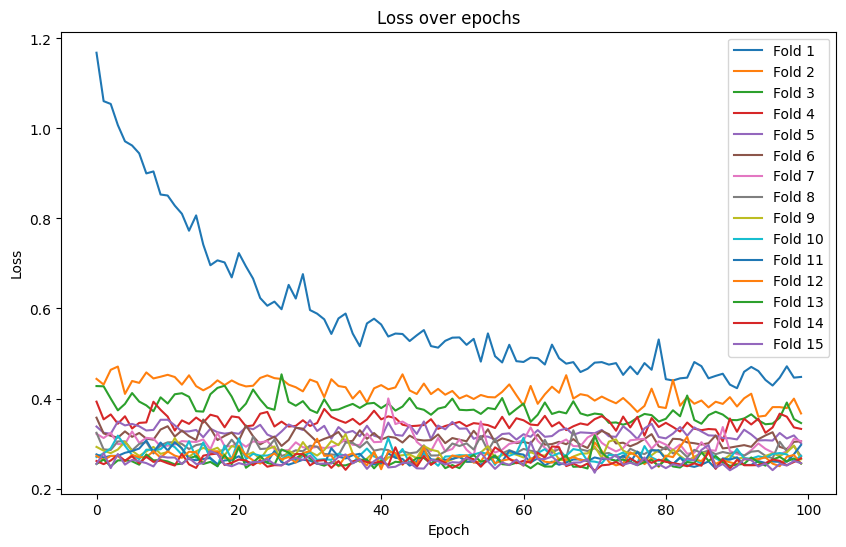

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
c= 11
epocas = 100
j = 0.8999999
i = 0.8
num_features = X.shape[1]
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

num_folds = 15
kf = KFold(n_splits=num_folds)

fold_accs = []
fold_losses = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    history = model.fit(X_train, y_train, epochs=epocas, verbose=0, validation_data=(X_val, y_val))
    
    fold_loss, fold_acc = model.evaluate(X_val, y_val, verbose=0)
    fold_losses.append(history.history['loss'])
    fold_accs.append(fold_acc)
    print(epocas, c, i, j, fold_acc)

mean_acc = np.mean(fold_accs)
print(epocas, c, i, j, mean_acc)

# Gráfica de la función de pérdida
plt.figure(figsize=(10, 6))
for loss in fold_losses:
    plt.plot(loss)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10', 'Fold 11', 'Fold 12', 'Fold 13', 'Fold 14', 'Fold 15'], loc='upper right')
plt.show()


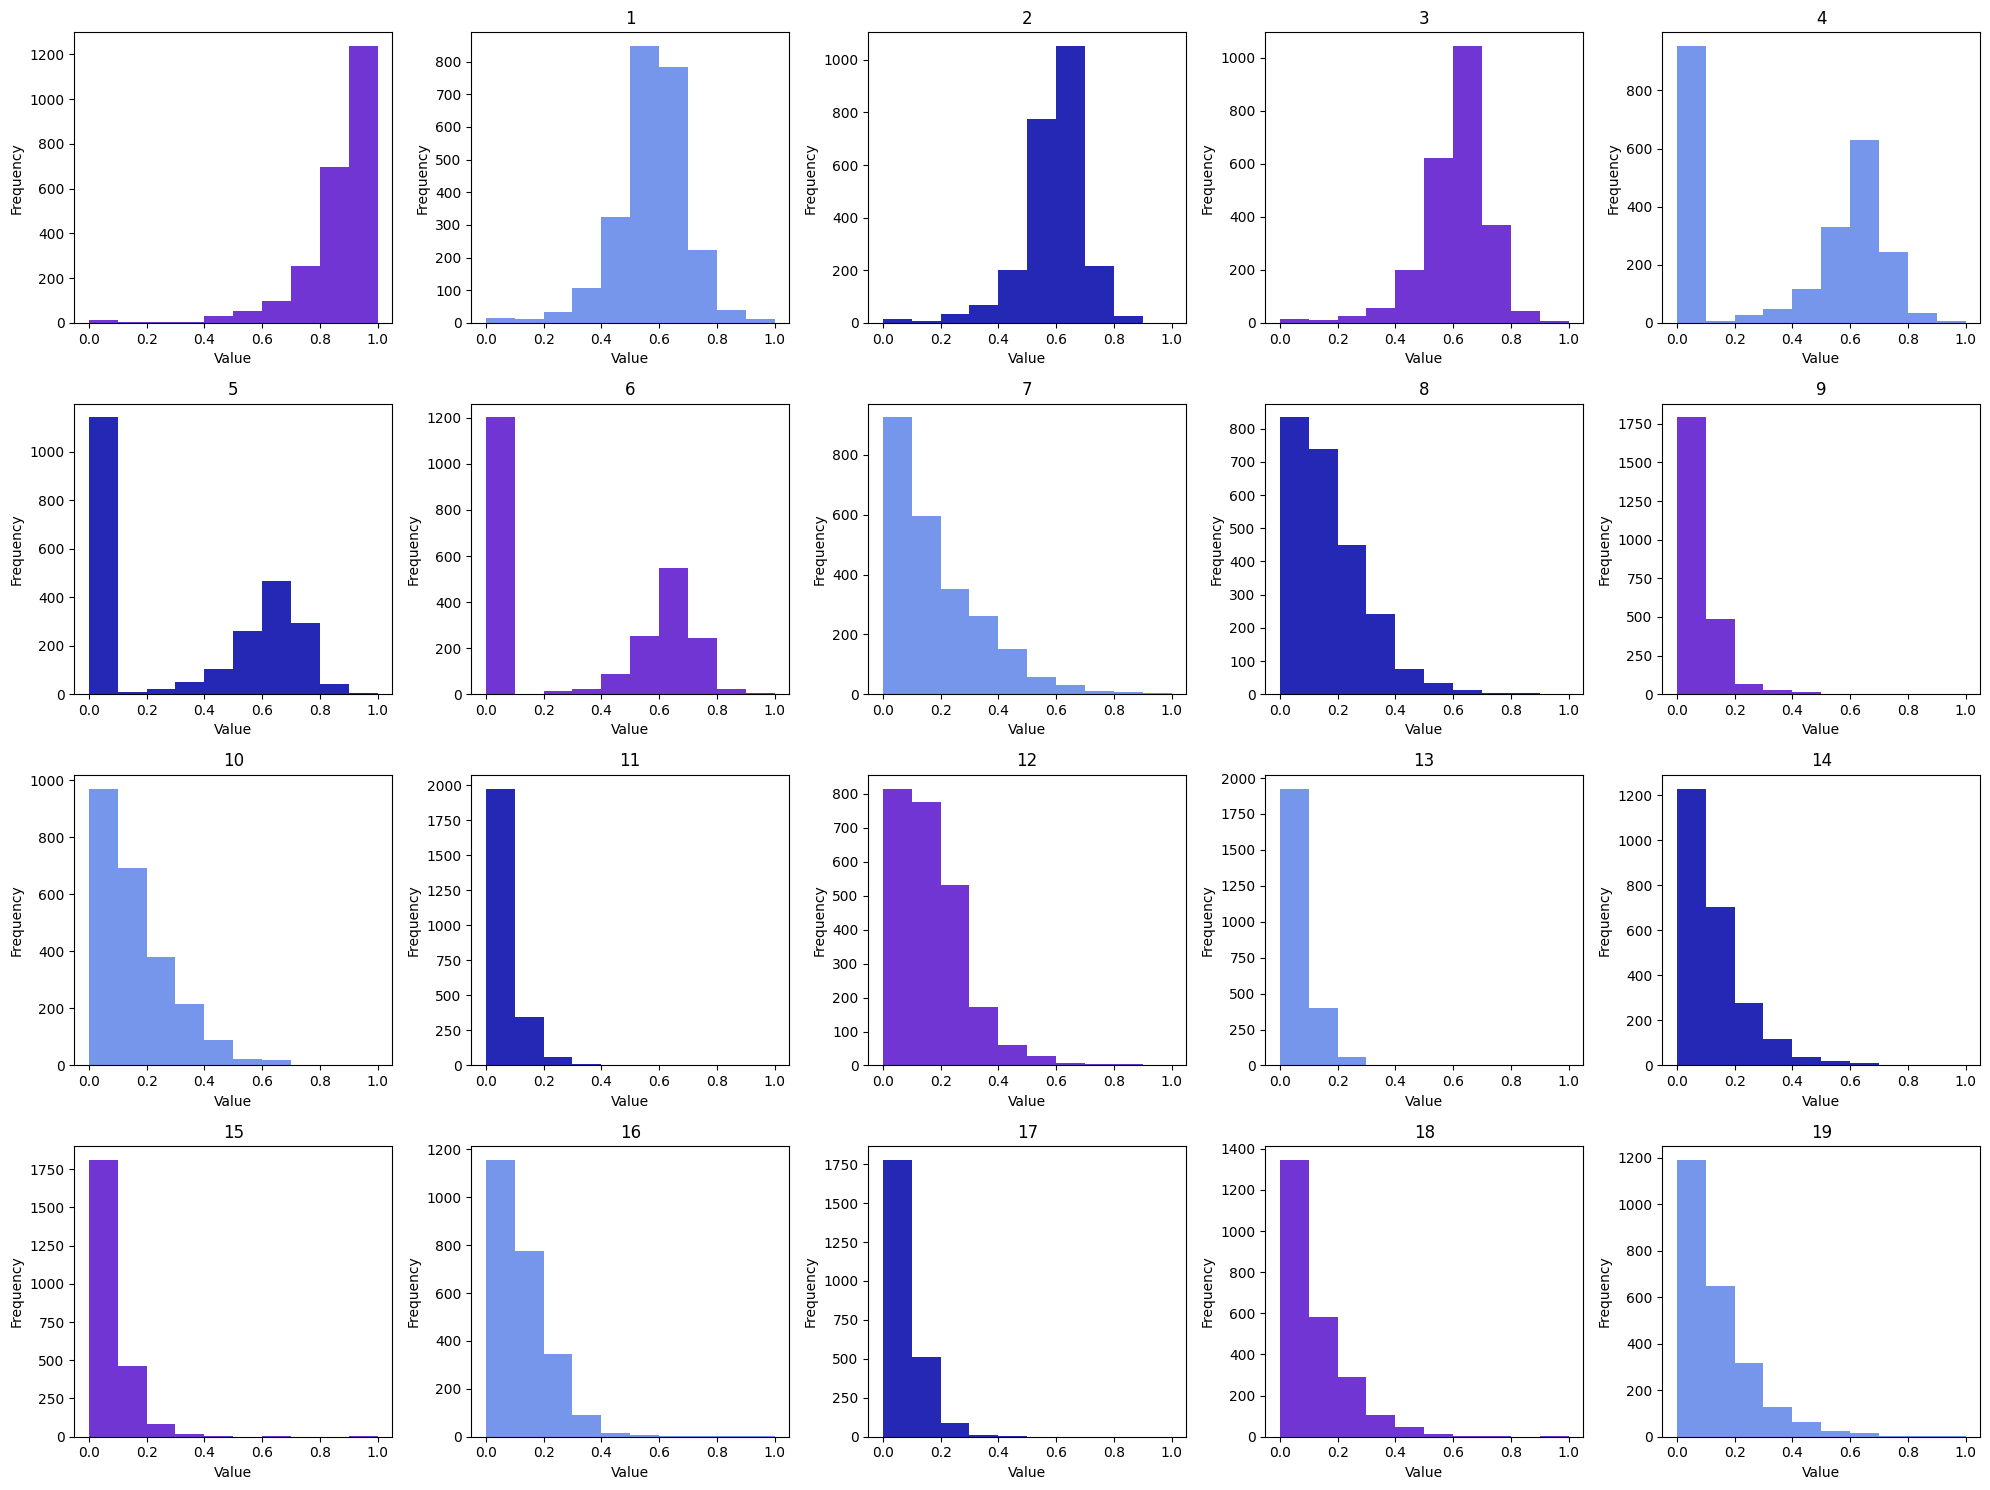

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)

# Calcula el número de filas y columnas para los subgráficos
num_rows = 4
num_cols = 5
num_plots = num_rows * num_cols

# Crea una nueva figura y ejes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Definir el esquema de colores personalizado
custom_colors = ['#7035d3', '#7696eb', '#2528b5']

# Itera sobre cada columna y grafícala en el subgráfico correspondiente
for idx, ax in enumerate(axes.flat):
    col_idx = idx % len(df.columns)
    df[df.columns[col_idx]].plot(kind='hist', ax=ax, title=df.columns[col_idx], color=custom_colors[col_idx % len(custom_colors)])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Ajusta el espaciado entre los subgráficos
plt.tight_layout()

# Muestra la figura
plt.show()


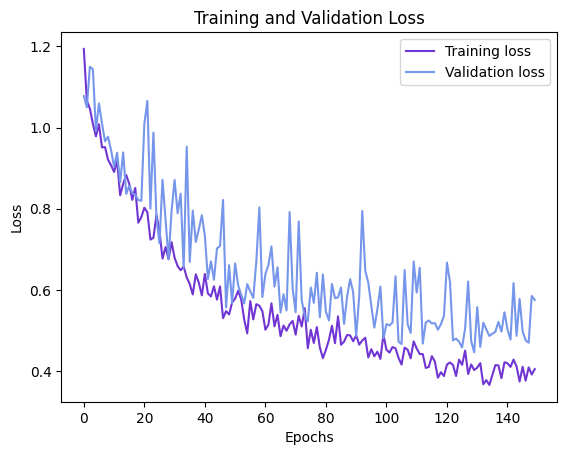

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8018 - loss: 0.4878 
Test Loss: 0.49674633145332336
Test Accuracy: 0.7958333492279053
Número de épocas utilizadas: 150


In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c = 11
j = 0.99999
i = 0.8
num_features = X.shape[1]
epocas_max = 1000

# Definir el modelo
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

# Compilar el modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definir EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitorizamos la pérdida en el conjunto de validación
    patience=20,         # Número de épocas sin mejoras después de las cuales se detiene el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos del modelo
)

# Entrenar el modelo con EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=epocas_max,
    validation_split=0.2,
    callbacks=[early_stopping],  # Usar la función de callback de EarlyStopping
    verbose=0
)

# Obtener la pérdida y la precisión de entrenamiento y prueba
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar la función de pérdida
plt.plot(train_loss, label='Training loss', color='#7035d3')
plt.plot(val_loss, label='Validation loss', color='#7696eb')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
num_epocas_utilizadas = early_stopping.stopped_epoch + 1
print("Número de épocas utilizadas:", num_epocas_utilizadas)


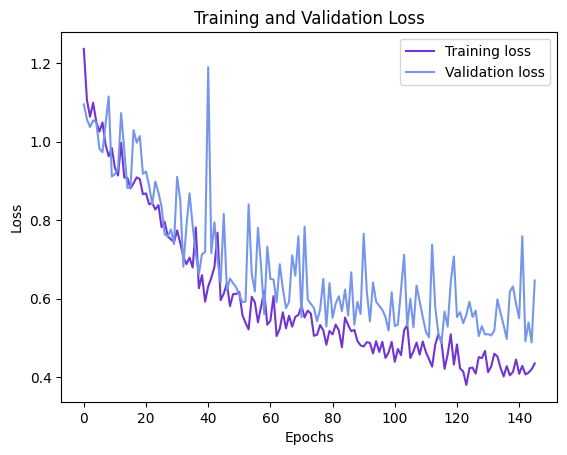

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.8016 - loss: 0.5483
Test Loss: 0.5592973828315735
Test Accuracy: 0.7854166626930237
Número de épocas utilizadas: 146


In [96]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c = 11
j = 0.99999
i = 0.8
num_features = X.shape[1]
epocas_max = 1000

# Definir el modelo
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

# Compilar el modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definir EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitorizamos la pérdida en el conjunto de validación
    patience=30,         # Número de épocas sin mejoras después de las cuales se detiene el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos del modelo
)

# Entrenar el modelo con EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=epocas_max,
    validation_split=0.3,
    callbacks=[early_stopping],  # Usar la función de callback de EarlyStopping
    verbose=0
)

# Obtener la pérdida y la precisión de entrenamiento y prueba
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar la función de pérdida
plt.plot(train_loss, label='Training loss', color='#7035d3')
plt.plot(val_loss, label='Validation loss', color='#7696eb')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
num_epocas_utilizadas = early_stopping.stopped_epoch + 1
print("Número de épocas utilizadas:", num_epocas_utilizadas)


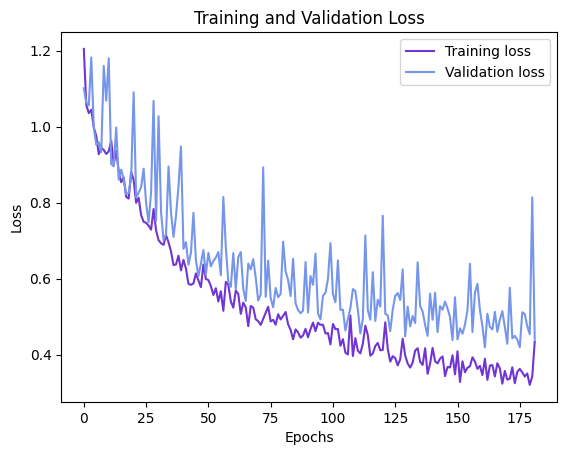

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8339 - loss: 0.4671 
Test Loss: 0.47739407420158386
Test Accuracy: 0.831250011920929
Número de épocas utilizadas: 182


In [79]:
# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos_normalizados.csv", header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c = 11
j = 0.99999
i = 0.8
num_features = X.shape[1]
epocas_max = 1000

# Definir el modelo
entrada = tf.keras.Input(shape=(num_features,))
oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
model = tf.keras.Model(inputs=entrada, outputs=salida)

# Compilar el modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definir EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitorizamos la pérdida en el conjunto de validación
    patience=20,         # Número de épocas sin mejoras después de las cuales se detiene el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos del modelo
)

# Entrenar el modelo con EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=epocas_max,
    validation_split=0.2,
    callbacks=[early_stopping],  # Usar la función de callback de EarlyStopping
    verbose=0
)

# Obtener la pérdida y la precisión de entrenamiento y prueba
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar la función de pérdida
plt.plot(train_loss, label='Training loss', color='#7035d3')
plt.plot(val_loss, label='Validation loss', color='#7696eb')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
num_epocas_utilizadas = early_stopping.stopped_epoch + 1
print("Número de épocas utilizadas:", num_epocas_utilizadas)
